In [14]:
import serial
import pymysql
from time import localtime, strftime

In [24]:
lastTime = 0
T = serial.Serial('/dev/ttyACM0', 9600)
strCo = ''
strTotal = ''
while True:
    strTotal = T.readline()
    strTotal = strTotal.decode('utf-8')
    strTotal = strTotal.replace("b", "")
    strTotal = strTotal.replace("'", "")
    strTotal = strTotal.replace("\n", "")
    strHumi = strTotal[10:16]
    strTemp = strTotal[4:10]
    strCo = strTotal[0:4]
    print(strTotal[0:4], strTotal[4:10], strTotal[10:16])
  
    db = pymysql.connect(host='localhost', user='guest_test', passwd = 'test1234!', db='ml_db')

    with db:
        cur = db.cursor()

        cur.execute('INSERT INTO co_eyes_temp(temperature, humidity, co2) VALUES (%s, %s, %s)', (strTemp, strHumi, strCo))
        db.commit()

400  26.60  41.00 
400  26.60  41.00 
400  26.60  41.00 
400  26.60  41.00 
400  26.60  41.00 
886  26.60  41.00 
1872  26.60  41.00
2641  26.60  41.00
3060  26.60  41.00
3400  26.60  41.00
3215  26.60  41.00


KeyboardInterrupt: 

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db= pymysql.connect( # db 연결
    user='guest_test',
    passwd='test1234!',
    host='121.143.172.28',
    db='ml_db')

cursor = db.cursor()
sql = "INSERT INTO co_eyes_predictlabel (label, total_sleep_count) VALUES (%s, %s)"
query = "SELECT * FROM co_eyes_predictlabel"
cursor.execute(query)
db.commit()

In [3]:
datas = cursor.fetchall()

In [4]:
datas

((1, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 12, 45)),
 (2, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 13, 24)),
 (3, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 13, 56)),
 (4, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 17, 46)),
 (5, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 20, 18)),
 (6, 'closed', 1, datetime.datetime(2022, 5, 9, 2, 26, 44)),
 (7, 'closed', 2, datetime.datetime(2022, 5, 9, 2, 26, 51)),
 (8, 'closed', 3, datetime.datetime(2022, 5, 9, 2, 26, 57)),
 (9, 'closed', 1, datetime.datetime(2022, 5, 10, 14, 26, 28)),
 (10, 'closed', 2, datetime.datetime(2022, 5, 10, 14, 26, 30)),
 (11, 'closed', 1, datetime.datetime(2022, 5, 10, 14, 26, 53)),
 (12, 'closed', 2, datetime.datetime(2022, 5, 10, 14, 27, 6)),
 (13, 'closed', 3, datetime.datetime(2022, 5, 10, 14, 27, 9)),
 (14, 'closed', 4, datetime.datetime(2022, 5, 10, 14, 27, 12)),
 (15, 'closed', 5, datetime.datetime(2022, 5, 10, 14, 27, 17)),
 (16, 'closed', 6, datetime.datetime(2022, 5, 10, 14, 27, 20)),
 (1

In [5]:
df = pd.DataFrame(datas)
df.columns = ['id', 'label', 'total_sleep_count', 'register_date']

In [6]:
df.head(5)

,id,label,total_sleep_count,register_date
0,1,closed,1,2022-05-09 02:12:45
1,2,closed,1,2022-05-09 02:13:24
2,3,closed,1,2022-05-09 02:13:56
3,4,closed,1,2022-05-09 02:17:46
4,5,closed,1,2022-05-09 02:20:18


In [7]:
df['register_date'] = df['register_date'].dt.day
df = df.groupby('register_date').max()
df

,id,label,total_sleep_count
register_date,,,
9,8,closed,3
10,28,closed,18
11,33,closed,5


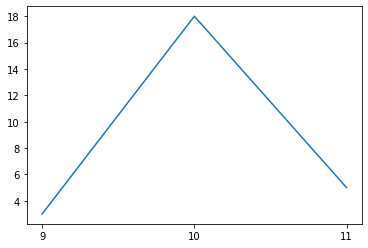

In [8]:
plt.plot(df.index, df['total_sleep_count'])
plt.xticks(df.index)
plt.show()

In [9]:
import seaborn as sns

In [11]:
plt.plot.area(df.index, df['total_sleep_count'])

AttributeError: 'function' object has no attribute 'area'

In [ ]:
df.plot.area()